# Probabilistic predictions with Gaussian process classification (GPC)
- 하이퍼파라미터의 다양한 선택에 따른 RBF 커널의 GPC(Gaussian Process Classifier) 예측 확률

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score, log_loss

# 데이터 생성
train_size = 50
rng = np.random.RandomState(0)
X = rng.uniform(0, 5, 100)[:, np.newaxis]
y = np.array(X[:, 0] > 2.5, dtype=int)

# 고정된 하이퍼파라미터와 최적화된 하이퍼파라미터를 가우스 프로세스를 지정
gp_fix = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0), optimizer=None)
gp_fix.fit(X[:train_size], y[:train_size])

gp_opt = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0))
gp_opt.fit(X[:train_size], y[:train_size])

print(
    "Log Marginal Likelihood (initial): %.3f"
    % gp_fix.log_marginal_likelihood(gp_fix.kernel_.theta)
)
print(
    "Log Marginal Likelihood (optimized): %.3f"
    % gp_opt.log_marginal_likelihood(gp_opt.kernel_.theta)
)

print(
    "Accuracy: %.3f (initial) %.3f (optimized)"
    % (
        accuracy_score(y[:train_size], gp_fix.predict(X[:train_size])),
        accuracy_score(y[:train_size], gp_opt.predict(X[:train_size])),
    )
)
print(
    "Log-loss: %.3f (initial) %.3f (optimized)"
    % (
        log_loss(y[:train_size], gp_fix.predict_proba(X[:train_size])[:, 1]),
        log_loss(y[:train_size], gp_opt.predict_proba(X[:train_size])[:, 1]),
    )
)

Log Marginal Likelihood (initial): -17.598
Log Marginal Likelihood (optimized): -3.875
Accuracy: 1.000 (initial) 1.000 (optimized)
Log-loss: 0.214 (initial) 0.319 (optimized)


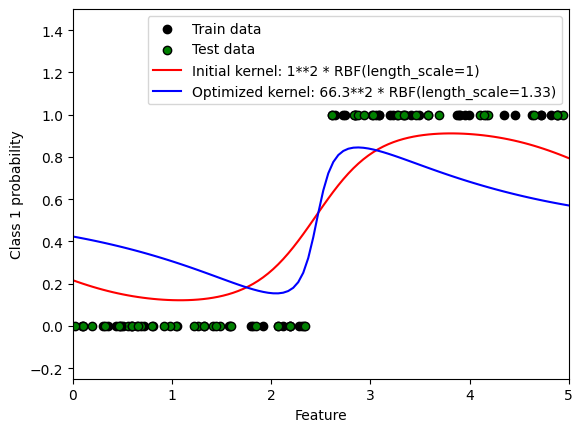

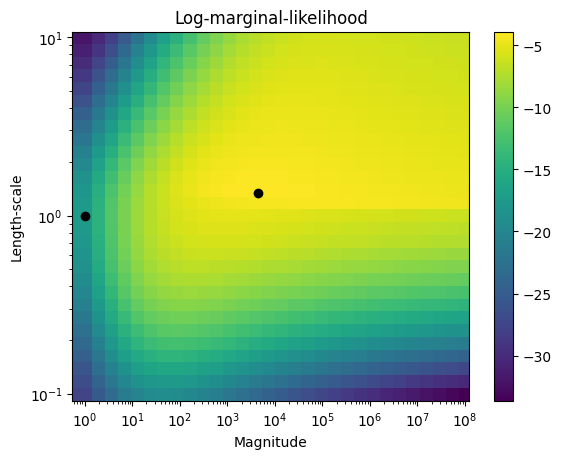

In [2]:
# posteriors 그리기
plt.figure()
plt.scatter(
    X[:train_size, 0], y[:train_size], c="k", label="Train data", edgecolors=(0, 0, 0)
)
plt.scatter(
    X[train_size:, 0], y[train_size:], c="g", label="Test data", edgecolors=(0, 0, 0)
)
X_ = np.linspace(0, 5, 100)
plt.plot(
    X_,
    gp_fix.predict_proba(X_[:, np.newaxis])[:, 1],
    "r",
    label="Initial kernel: %s" % gp_fix.kernel_,
)
plt.plot(
    X_,
    gp_opt.predict_proba(X_[:, np.newaxis])[:, 1],
    "b",
    label="Optimized kernel: %s" % gp_opt.kernel_,
)
plt.xlabel("Feature")
plt.ylabel("Class 1 probability")
plt.xlim(0, 5)
plt.ylim(-0.25, 1.5)
plt.legend(loc="best")

# LML landscape 그리기
plt.figure()
theta0 = np.logspace(0, 8, 30)
theta1 = np.logspace(-1, 1, 29)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [
    [
        gp_opt.log_marginal_likelihood(np.log([Theta0[i, j], Theta1[i, j]]))
        for i in range(Theta0.shape[0])
    ]
    for j in range(Theta0.shape[1])
]
LML = np.array(LML).T
plt.plot(
    np.exp(gp_fix.kernel_.theta)[0], np.exp(gp_fix.kernel_.theta)[1], "ko", zorder=10
)
plt.plot(
    np.exp(gp_opt.kernel_.theta)[0], np.exp(gp_opt.kernel_.theta)[1], "ko", zorder=10
)
plt.pcolor(Theta0, Theta1, LML)
plt.xscale("log")
plt.yscale("log")
plt.colorbar()
plt.xlabel("Magnitude")
plt.ylabel("Length-scale")
plt.title("Log-marginal-likelihood")

plt.show()